In [1]:
import os
import matplotlib.pyplot as plt
import re
import numpy as np
import ltspice
from matplotlib import cm
import warnings
from matplotlib import pyplot as plt

In [2]:
file_dir ='../../binary/'

In [3]:
filelist = []

In [4]:
len_array=[]


In [5]:
for fname in os.listdir(file_dir):
    if fname.startswith('data'):
        filelist.append(fname)
        temp = fname[:-4].split('_')
        length = float(temp[1][1:])
        len_array.append(length)

In [6]:
file_count=len(filelist)


In [7]:
print('Total count of data files is',file_count,)

Total count of data files is 10


In [8]:
fd=[]
fd_temp=[]
Vgs=[]
Cgd=[]
Cgs=[]
gds=[]
gm=[]
Id=[]
param_l=[]
Vth=[]
Vds=[]
Vgs_temp=[]
Cgd_temp=[]
Cgs_temp=[]
gds_temp=[]
gm_temp=[]
Id_temp=[]
param_l_temp=[]
Vth_temp=[]
Vds_temp=[]
   
for fname in filelist:
    fd_temp =ltspice.Ltspice(file_dir+'/'+fname)
    fd.append(fd_temp)
    fd_temp.parse()
    Vgs_temp = fd_temp.get_data('v(vgs)')
    Cgd_temp = fd_temp.get_data('@m.xm1.m0[cgd]')
    Cgs_temp = fd_temp.get_data('@m.xm1.m0[cgs]')
    gds_temp = fd_temp.get_data('@m.xm1.m0[gds]')
    gm_temp = fd_temp.get_data('@m.xm1.m0[gm]')
    Id_temp = fd_temp.get_data('i(@m.xm1.m0[id])')
    param_l_temp = fd_temp.get_data('v(@m.xm1.m0[l])')
    Vth_temp = fd_temp.get_data('v(@m.xm1.m0[vth])')
    Vds_temp = fd_temp.get_data('v(vds)')
    Cgd.append(Cgd_temp)
    Cgs.append(Cgs_temp)
    gds.append(gds_temp)
    gm.append(gm_temp)
    Id.append(Id_temp)
    Vth.append(Vth_temp)
    Vds.append(Vds_temp)
Vgs = Vgs_temp   
Vds = Vds_temp  
param_l=param_l_temp


[Warning] Variable data type is detected as double precision.
[Warning] Variable data type is detected as double precision.
[Warning] Variable data type is detected as double precision.
[Warning] Variable data type is detected as double precision.
[Warning] Variable data type is detected as double precision.
[Warning] Variable data type is detected as double precision.
[Warning] Variable data type is detected as double precision.
[Warning] Variable data type is detected as double precision.
[Warning] Variable data type is detected as double precision.
[Warning] Variable data type is detected as double precision.


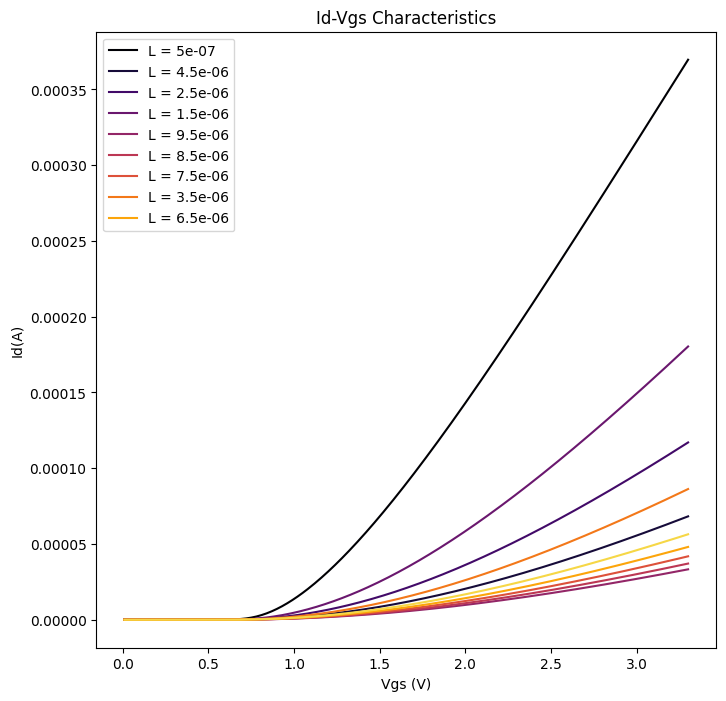

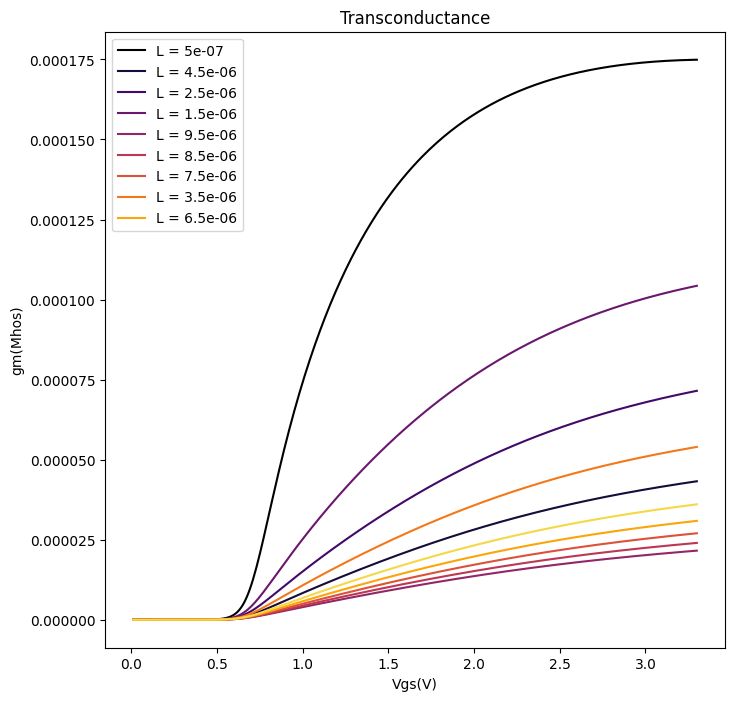

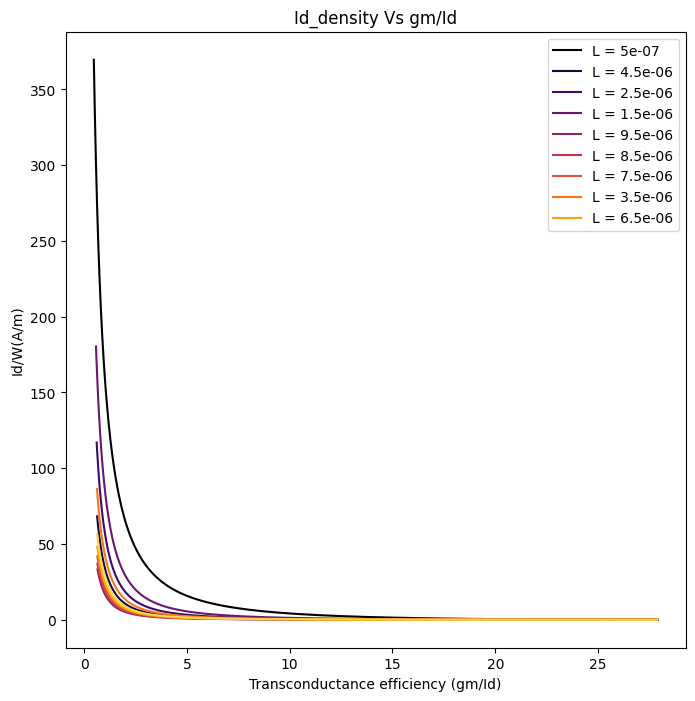

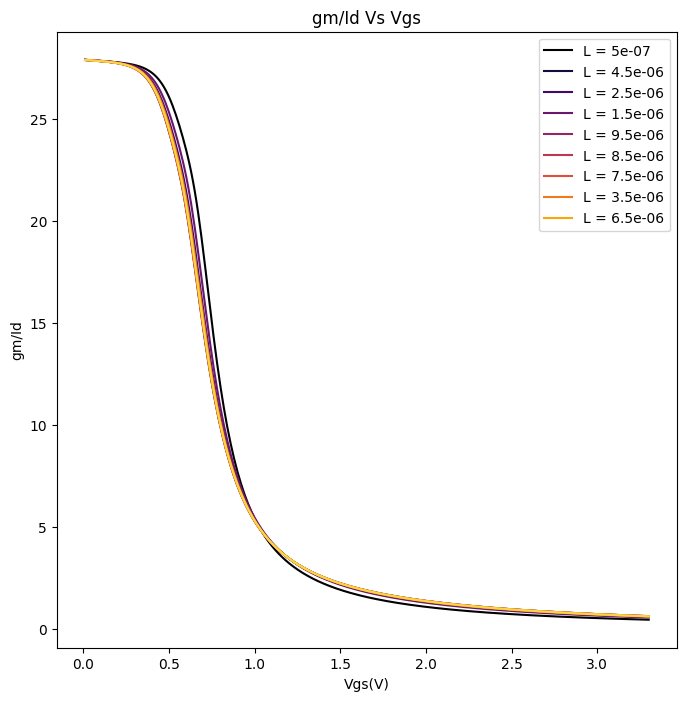

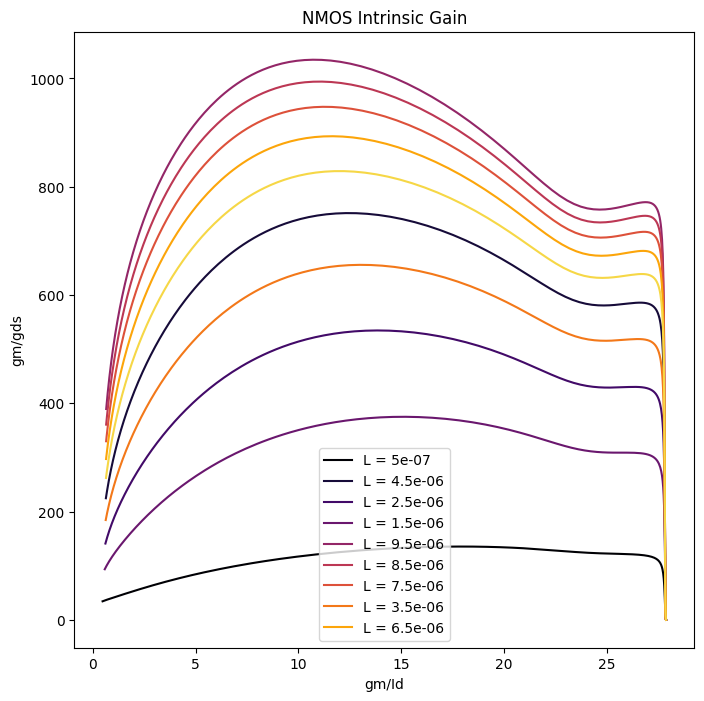

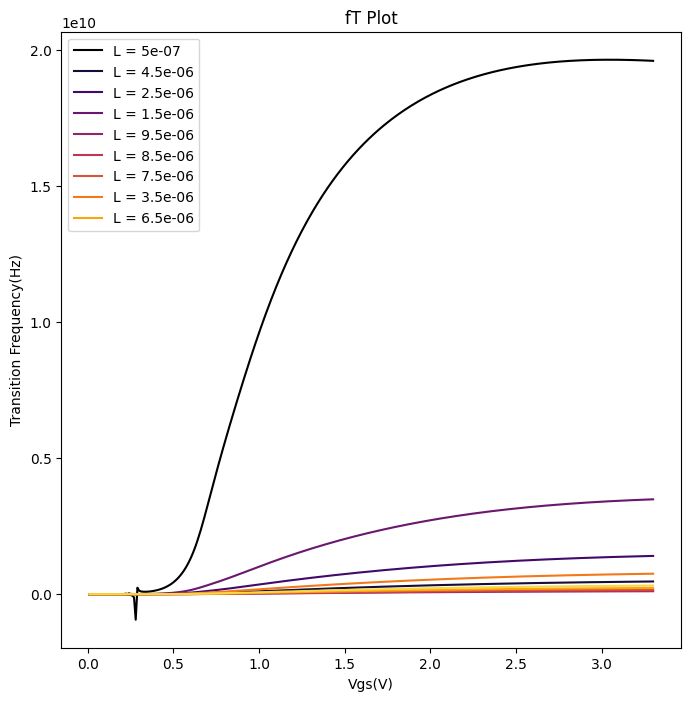

In [13]:
plt.rcParams['figure.figsize'] = [8, 8]
leg =[]

for i in range(file_count):
    L = len_array[i]
    W = 1E-6
    color = cm.get_cmap('inferno')(i/file_count)
    leg.append('L = {}'.format(L))
    
    plt.figure(1)
    plt.legend(leg)
                   
    plt.xlabel('Vgs (V)')
    plt.ylabel('Id(A)')
    plt.title('Id-Vgs Characteristics')
    plt.plot(Vgs,Id[i],color = color)
    
    plt.figure(2)
    plt.legend(leg)
    
    plt.xlabel('Vgs(V)')
    plt.ylabel('gm(Mhos)')
    plt.title('Transconductance')
    plt.plot(Vgs,gm[i],color = color)
    
    plt.figure(3)
    plt.legend(leg)
    
    plt.xlabel('Transconductance efficiency (gm/Id)')
    plt.ylabel('Id/W(A/m)')
    plt.title('Id_density Vs gm/Id')
    plt.plot(gm[i]/Id[i],Id[i]/W,color = color)
    
    plt.figure(4)
    plt.legend(leg)
               
    plt.xlabel('Vgs(V)')
    plt.ylabel('gm/Id')
    plt.title('gm/Id Vs Vgs')
    plt.plot(Vgs,gm[i]/Id[i],color = color)
    
    plt.figure(5)
    plt.legend(leg)
               
    plt.xlabel('gm/Id')
    plt.ylabel('gm/gds')
    plt.title('NMOS Intrinsic Gain')
    plt.plot(gm[i]/Id[i],gm[i]/gds[i],color = color)
    
    plt.figure(6)
    plt.legend(leg)
    
    plt.xlabel('Vgs(V)')
    plt.ylabel('Transition Frequency(Hz)')
    plt.title('fT Plot')
    plt.plot(Vgs,-(gm[i])/(2*np.pi*(Cgd[i]+Cgs[i])),color = color)
